## はじめに

こんにちは！この記事では、データ分析初心者の私が、`Python`と時系列予測ライブラリ`Prophet`を使って、野沢温泉（長野県）の過去の気象データから未来の積雪量を予測するプロジェクトに挑戦した記録をまとめます。単純な予測で終わらず、特徴量を追加してモデルを改善し、評価指標で客観的に評価するまでの一連のプロセスを体験しました。

### 積雪量を分析してみようと思った背景

今年の夏も非常に暑い日が続き、各所で最高気温を更新しました。地球温暖化という言葉を初めて耳にした約35年前から「**Save The Snow、Save The Winter！**」という合言葉の元、スキー場のクリーン活動を行い続けている昔からの馴染みに敬意を払い、少しでも今後の活動の後押しになれば！！そんな思いから、今回その活動拠点でウィンタースポーツの聖地として名高い **野沢温泉リゾート** の積雪予測を行い、この活動の活性化に繋がればと思い至った次第です。また、個人的には、良い結果・悪い結果を全て受け入れて今後のウインタースポーツとの向き合い方、楽しみ方の一つの指標になれば良いなぁと考えております。


### 今回の目的
*   **目的**: 野沢温泉の地域活性化のため、各種イベントや宿泊施設の経営企画などに役立てられる指標として、2025～2026年の冬シーズンの野沢温泉における積雪量を予測する
*   **使用言語**: Python
*   **主要ライブラリ**: `pandas`, `matplotlib`, `seaborn`, `prophet`
*   **データセット**: 気象庁ホームページより野沢温泉日別気象データを収集 (詳細は次の通り)
    * **期間**：1984年1月～2025年7月まで
    * **項目**：年月・最深積雪(cm)・平均気温(℃)・日最高気温の平均(℃)・日最低気温の平均(℃)・最高気温(℃)・最低気温(℃)・日平均気温0℃未満日数(日)・日最高気温0℃未満日数(日)・日最低気温0℃未満日数(日)・降雪量合計(cm)・降雪量日合計最大(cm)・降雪量日合計3cm以上日数(日)・降水量の合計(mm)
* **環境**： Windows + Jupyter Notebook
#### 私的な分析ではありますが、この記事が以下のような方の参考になれば幸いです。
*   データ分析や機械学習に興味があるけど、何から始めたらいいか分からない方
*   Pythonやpandasの基本的な使い方を知りたい方
*   `Prophet`を使った時系列予測の具体的な流れを知りたい方
*   モデルの評価や改善のプロセスに興味がある方

#### それでは早速、始めてまいります。

## ステップ1：データの読み込みと前処理
---
まずは、データをPythonで扱えるように準備します。

### 1-1. データの読み込みと確認
`pandas`ライブラリを使ってCSVファイルを読み込み、`head()`で最初の5行を表示して、データの中身を確認します。同時にデータ型も確認します。

In [1]:
# ライブラリをインポートして準備
import numpy as np
import pandas as pd

In [2]:
# CSVファイルを読み込みます
df = pd.read_csv('data/nozawa_data.csv')

In [3]:
# 最初の5行を表示して、データの中身を確認します
df.head()

,年月,最深積雪(cm),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),最高気温(℃),最低気温(℃),日平均気温0℃未満日数(日),日最高気温0℃未満日数(日),日最低気温0℃未満日数(日),降雪量合計(cm),降雪量日合計最大(cm),降雪量日合計3cm以上日数(日),降水量の合計(mm)
0,Jan-84,282.0,-3.0,-0.1,-5.5,3.7,-9.8,25,15,27,565.0,58.0,23.0,417
1,Feb-84,344.0,-3.9,-1.4,-6.3,3.4,-10.8,28,17,29,455.0,63.0,22.0,366
2,Mar-84,353.0,-1.2,2.1,-4.4,12.9,-9.7,22,6,28,273.0,43.0,18.0,160
3,Apr-84,258.0,6.0,11.1,2.3,20.9,-4.5,0,0,9,65.0,5.0,13.0,21
4,May-84,31.0,13.5,19.3,9.0,24.8,4.7,0,0,0,8.0,4.0,2.0,84


In [4]:
# データの型を確認します
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   年月                499 non-null    object 
 1   最深積雪(cm)          364 non-null    float64
 2   平均気温(℃)           499 non-null    float64
 3   日最高気温の平均(℃)       499 non-null    float64
 4   日最低気温の平均(℃)       499 non-null    float64
 5   最高気温(℃)           499 non-null    float64
 6   最低気温(℃)           499 non-null    float64
 7   日平均気温0℃未満日数(日)    499 non-null    int64  
 8   日最高気温0℃未満日数(日)    499 non-null    int64  
 9   日最低気温0℃未満日数(日)    499 non-null    int64  
 10  降雪量合計(cm)         363 non-null    float64
 11  降雪量日合計最大(cm)      363 non-null    float64
 12  降雪量日合計3cm以上日数(日)  363 non-null    float64
 13  降水量の合計(mm)        499 non-null    int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 54.7+ KB


In [5]:
# 詳しく欠損値を確認
df.isnull().sum()

年月                    0
最深積雪(cm)            135
平均気温(℃)               0
日最高気温の平均(℃)           0
日最低気温の平均(℃)           0
最高気温(℃)               0
最低気温(℃)               0
日平均気温0℃未満日数(日)        0
日最高気温0℃未満日数(日)        0
日最低気温0℃未満日数(日)        0
降雪量合計(cm)           136
降雪量日合計最大(cm)        136
降雪量日合計3cm以上日数(日)    136
降水量の合計(mm)            0
dtype: int64

In [6]:
# データの基本統計量を確認します
df.describe()

,最深積雪(cm),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),最高気温(℃),最低気温(℃),日平均気温0℃未満日数(日),日最高気温0℃未満日数(日),日最低気温0℃未満日数(日),降雪量合計(cm),降雪量日合計最大(cm),降雪量日合計3cm以上日数(日),降水量の合計(mm)
count,364.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.00000,499.000000,363.000000,363.000000,363.000000,499.000000
mean,81.958791,10.382966,15.101202,6.665531,22.103206,1.426653,5.490982,1.88978,9.416834,129.495868,21.909091,8.881543,147.653307
std,91.328402,8.959217,9.590920,8.729170,9.077287,8.955797,8.857270,3.98817,11.890844,156.269288,23.324518,9.313435,84.056433
min,0.000000,-3.900000,-1.400000,-8.100000,2.100000,-15.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,0.000000,1.600000,5.450000,-1.700000,13.900000,-6.400000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,88.000000
50%,50.500000,10.900000,16.100000,7.000000,24.200000,-0.200000,0.000000,0.00000,1.000000,54.000000,16.000000,5.000000,127.000000
75%,154.250000,18.750000,23.800000,14.950000,30.050000,9.150000,9.000000,1.00000,22.000000,240.000000,39.000000,17.000000,193.000000
max,353.000000,26.000000,31.900000,21.400000,36.400000,19.100000,31.000000,20.00000,31.000000,666.000000,90.000000,31.000000,623.000000


`info()`でデータ型を確認したところ、日付(`年月`)がただの文字列(`object`)になっており、`isnull().sum()`で欠損値を確認すると、積雪量や降雪量の列に135～136あることが分かりました。

**【私の考察】**
> 欠損値は、別途Excelで確認、夏期間のものだと判明したので`0`で補完の必要性がある。
> 年月列は、時系列分析のために正しい日付型(`datetime`)に変換する必要がある。
> `df.describe()`で基本統計量を見ると面白いデータが並んでますね。日平均気温0℃未満日数と降雪量日合計3cm以上日、更に、日最低気温0℃未満日数がすべて共に31日となってますね。気象データが欲しくなる（またの機会に…）。

この方針に基づき、次の前処理を行います。

### 1-2. データ型の変換と欠損値の処理
pandasのto_datetimeを使って、日付の列を正しい日付型に変換します。
fillna(0)という命令を使って、すべての欠損値を0で埋めます。

In [7]:
df['年月'] = pd.to_datetime(df['年月'], format='%b-%y')

In [8]:
df = df.fillna(0)

In [9]:
print(df.head(3))
print('\n')
print(df.info())

          年月  最深積雪(cm)  平均気温(℃)  日最高気温の平均(℃)  日最低気温の平均(℃)  最高気温(℃)  最低気温(℃)  \
0 1984-01-01     282.0     -3.0         -0.1         -5.5      3.7     -9.8   
1 1984-02-01     344.0     -3.9         -1.4         -6.3      3.4    -10.8   
2 1984-03-01     353.0     -1.2          2.1         -4.4     12.9     -9.7   

   日平均気温0℃未満日数(日)  日最高気温0℃未満日数(日)  日最低気温0℃未満日数(日)  降雪量合計(cm)  降雪量日合計最大(cm)  \
0              25              15              27      565.0          58.0   
1              28              17              29      455.0          63.0   
2              22               6              28      273.0          43.0   

   降雪量日合計3cm以上日数(日)  降水量の合計(mm)  
0              23.0         417  
1              22.0         366  
2              18.0         160  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   年月            

**【ポイント】**
*   `pd.to_datetime()`で日付型に変換、`format='%b-%y'`とすることで、現在の形式を指定し確実に変換することで、後に年や月を簡単に取り出したり、期間での絞り込みが楽になります。
*   `fillna(0, inplace=True)`で、データフレーム内の全ての欠損値を0に置き換えています。

ステップ2：データの可視化と特徴量の検討
次に、データにどのような傾向があるか、グラフにして探ります。

2-1. ラインプロットで時間の経過と積雪量の変化を可視化

## ステップ2：データの可視化と特徴量の検討
---
次に、データにどのような傾向があるか、グラフにして探ります。
### 2-1. ラインプロットで時間の経過と積雪量の変化を可視化

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import japanize_matplotlib
import seaborn as sns

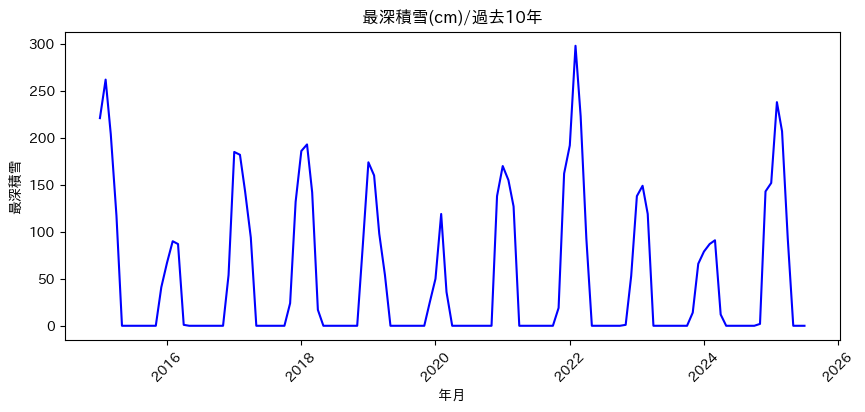

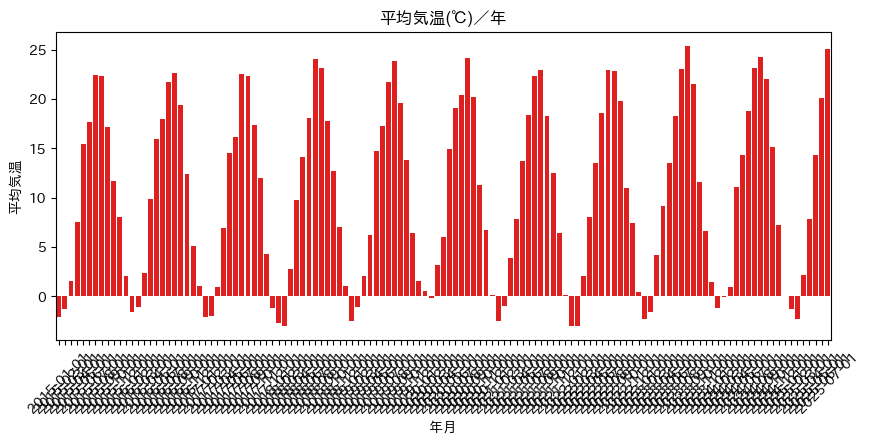

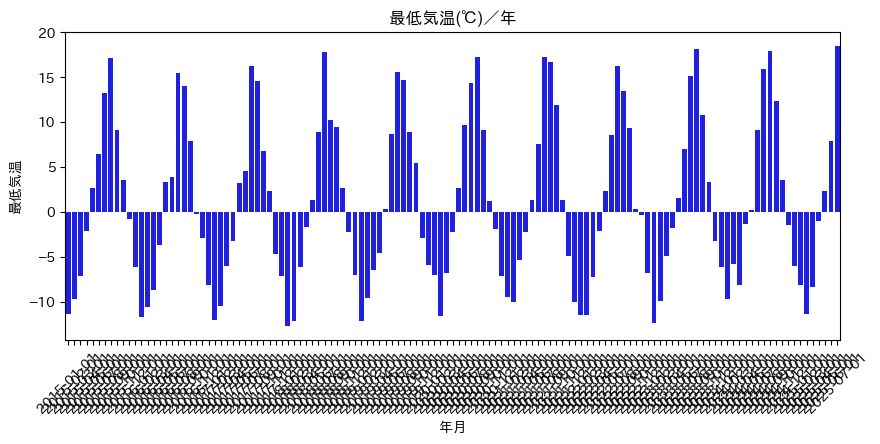

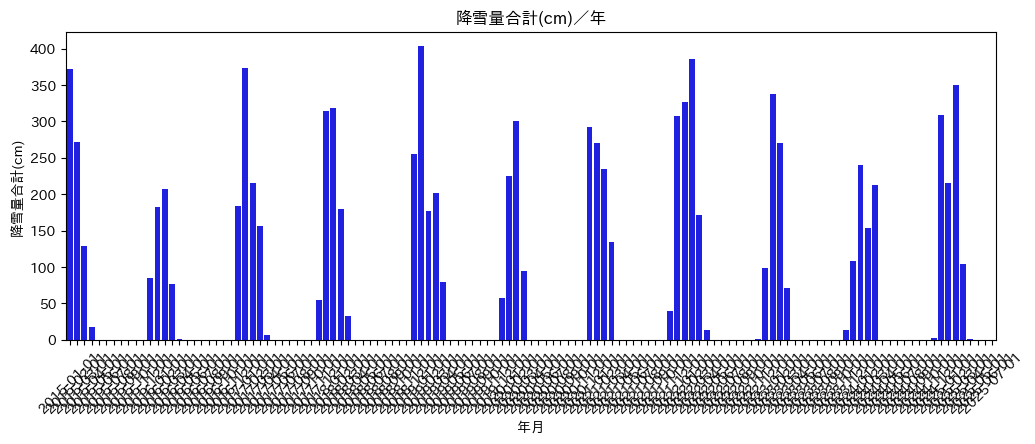

In [11]:
# seabornで時間の経過と最深積雪、平均気温、最低気温の変化を確認
time = df[df['年月'] > '2014-12-01']

# 1つ目のグラフを描画(最深積雪(cm))
plt.figure(figsize=(10, 4))
sns.lineplot(x='年月', y='最深積雪(cm)', data=time, color='blue')
plt.title('最深積雪(cm)/過去10年')
plt.xticks(rotation=45)
plt.ylabel('最深積雪')
plt.show()

# 2つ目のグラフを描画(平均気温(℃))
plt.figure(figsize=(10, 4))
sns.barplot(x='年月', y='平均気温(℃)', data=time, color='red')
plt.title('平均気温(℃)／年')
plt.xticks(rotation=45)
plt.ylabel('平均気温')
plt.show()

# 3つ目のグラフを描画(最低気温(℃))
plt.figure(figsize=(10, 4))
sns.barplot(x='年月', y='最低気温(℃)', data=time, color='blue')
plt.title('最低気温(℃)／年')
plt.xticks(rotation=45)
plt.ylabel('最低気温')
plt.show()

# 4つ目のグラフを描画(降雪量合計(cm))
plt.figure(figsize=(12, 4))
sns.barplot(x='年月', y='降雪量合計(cm)', data=time, color='blue')
plt.title('降雪量合計(cm)／年')
plt.xticks(rotation=45)
plt.ylabel('降雪量合計(cm)')
plt.show()

その年によって積雪量にもバラツキがあり、予測が難しそうですね。
グラフの山と谷はそれぞれ、冬季と夏季だということが分かります。

**【私の考察】**
> シーズンによっての降雪量の変化が気になる！積雪に大きな影響を及ぼすであろう特徴量なので冬季シーズンに限定した方が良いかもしれない。

こちらのグラフを先にツ切りましたが、見えにくかったので上記グラフに変更！！
MarkDownにして残しておく事とします。

# seabornで時間の経過と最深積雪、平均気温、最低気温の変化を確認
time = df[df['年月'] > '2014-07-01']

# 2行2列のサブプロットを作成
# axes[0]が左のグラフ、axes[1]が右のグラフに対応
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# 1つ目のグラフを1列目左側のaxesに描画
sns.lineplot(x='年月', y='最深積雪(cm)', data=time, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('最深積雪(cm)／年')
plt.xticks(rotation=45)
axes[0, 0].set_ylabel('最深積雪')

# 2つ目のグラフを1列目右側のaxesに描画
sns.barplot(x='年月', y='平均気温(℃)', data=time, ax=axes[0, 1], color='red')
axes[0, 1].set_title('平均気温(℃)／年')
plt.xticks(rotation=45)
axes[0, 1].set_ylabel('平均気温')

# 3つ目のグラフを2列目左側のaxesに描画
sns.barplot(x='年月', y='最低気温(℃)', data=time, ax=axes[1, 0], color='blue')
axes[1, 0].set_title('最低気温(℃)／年')
plt.xticks(rotation=45)
axes[1, 0].set_ylabel('最低気温')

# 4つ目のグラフを2列目右側のaxesに描画
sns.barplot(x='年月', y='降雪量合計(cm)', data=time, ax=axes[1, 1], color='blue')
axes[1, 1].set_title('降雪量合計(cm)／年')
plt.xticks(rotation=45)
axes[1, 1].set_ylabel('降雪量合計(cm)')

# 全体のレイアウトを調整
plt.tight_layout()

# グラフを表示
plt.show()

### 2-2. barplotで冬季の降雪量(cm)を可視化
ということで、冬季に限定（11月～４月間)して<ins>降雪量合計(cm)</ins>の合計を可視化してみたいと思います。

In [12]:
# 年と月を抽出
df['year'] = df['年月'].dt.year
df['month'] = df['年月'].dt.month

# 積雪シーズンを定義する'season_year'列を作成
# 11月と12月は同じ年、1月から4月は前年の年として扱う
df['season_year'] = df['year'].where(df['month'] >= 11, df['year'] - 1) 

# 11月～4月の期間のデータのみを抽出
snow_season_df = df[df['month'].isin([11, 12, 1, 2, 3, 4])]

# ★ ここで2014年以降のデータのみに絞り込みます
filtered_df = snow_season_df[snow_season_df['season_year'] > 2004]

# 'season_year'ごとに積雪量を合計
yearly_total_snowfall = filtered_df.groupby('season_year')['降雪量合計(cm)'].sum().reset_index()

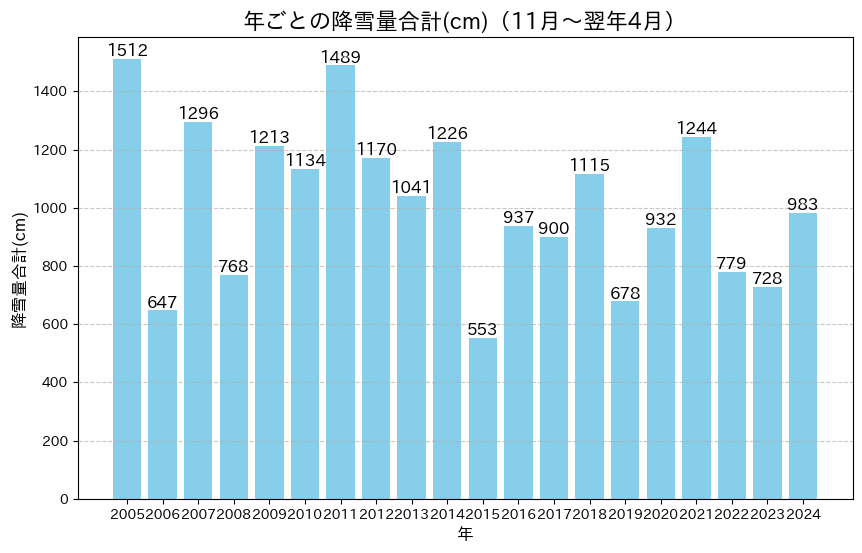

In [13]:
# バーグラフを作成
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_total_snowfall['season_year'], yearly_total_snowfall['降雪量合計(cm)'], color='skyblue')

# 各バーの上に積雪合計量を表示
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=12)

# グラフのタイトルとラベルを設定
plt.title('年ごとの降雪量合計(cm)（11月～翌年4月）', fontsize=16)
plt.xlabel('年', fontsize=12)
plt.ylabel('降雪量合計(cm)', fontsize=12)

# X軸の目盛りをシーズン年に設定
plt.xticks(yearly_total_snowfall['season_year'])

# グリッド線を追加
plt.grid(axis='y', linestyle='--', alpha=0.7)

年ごとの降雪量にも差がありますね。数字も加えるとその差が良く分かります。この降雪量を積雪につなげるのがズバリ「気温」ですね。気温が低いほど積雪に繋がるのでしょう。

**【私の考察】**
> 平均気温が低い12月～4月にかけての「降雪量」が、目的変数に対して重要な特徴量となるかも。

### 2-3. 気温と降雪量のサブプロットの作成
関連性のありそうな、気温と降雪量の関係をグラフで可視化

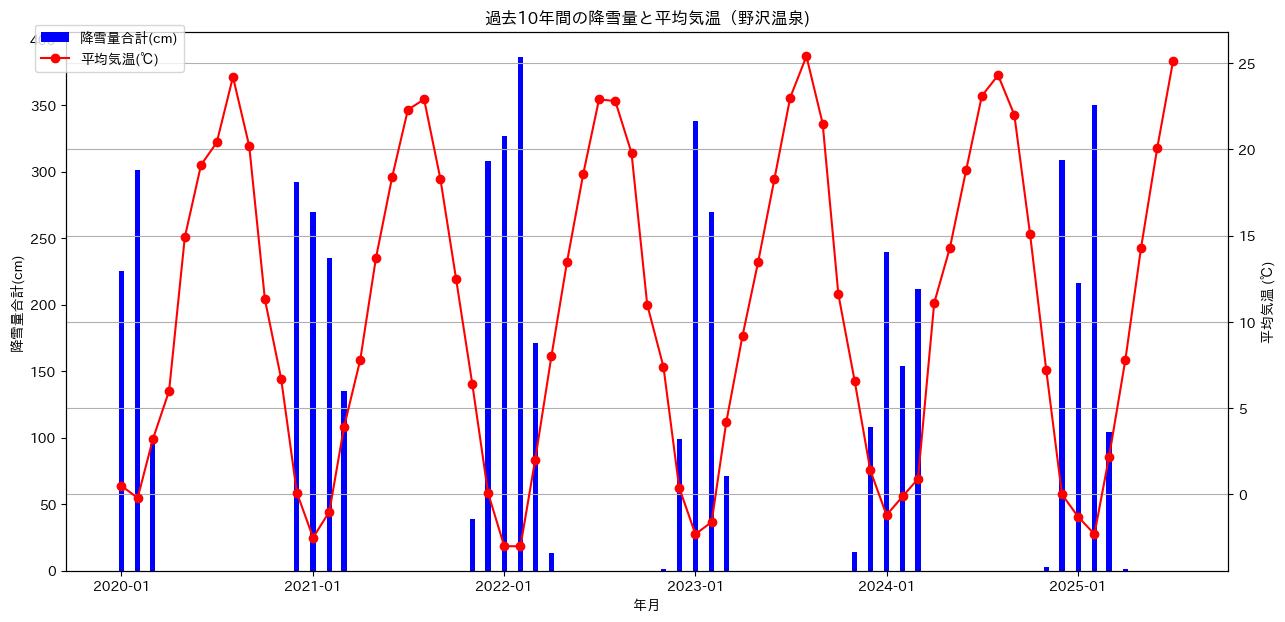

In [14]:
# 1. 2020年以降のデータに絞り込みます
df_last10 = df[df['年月'].dt.year >= 2020].copy()

# 2. グラフの描画領域を準備します
fig, ax1 = plt.subplots(figsize=(15, 7))

# 3. 1つ目の軸（左側）に積雪量のグラフを描画します
ax1.bar(df_last10['年月'], df_last10['降雪量合計(cm)'], color='blue',  width=10, label='降雪量合計(cm)')
ax1.set_ylabel('降雪量合計(cm)')
ax1.set_xlabel('年月')

# 4. 2つ目の軸（右側）を作成します
ax2 = ax1.twinx()

# 5. 2つ目の軸に平均気温のグラフを描画します
ax2.plot(df_last10['年月'], df_last10['平均気温(℃)'], color='r', marker='o', linestyle='-', label='平均気温(℃)')
ax2.set_ylabel('平均気温 (℃)')

# 6. グラフの見た目を整えます
plt.title('過去10年間の降雪量と平均気温（野沢温泉)')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.grid(True)

# x軸のフォーマットを年月が見やすいように調整
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# plt.xticks(rotation=45) # X軸のラベルを45度回転させて見やすくする

# 7. グラフを表示します
plt.show()

やはり負の相関関係ですね。（目的が積雪量の予測ということで、冬季の変化を確認しやすいように過去5年に絞った表を描画させています。

**【私の考察】**
> 平均気温が低い12月～4月にかけての「最深積雪」が、主な予測の目的変数となる。
> 反対に目標変数に対して積雪の無い時期が（5月～10月）と長く実績が図れないため時期を絞る必要がありそうだ。
> 他の特徴量との関係も気になるので、ヒートマップで相関関係の全体像を把握したい。

### 2-4. 相関ヒートマップの作成
どの特徴量が積雪量と関係が深いかを探るため、ヒートマップを作成しました。

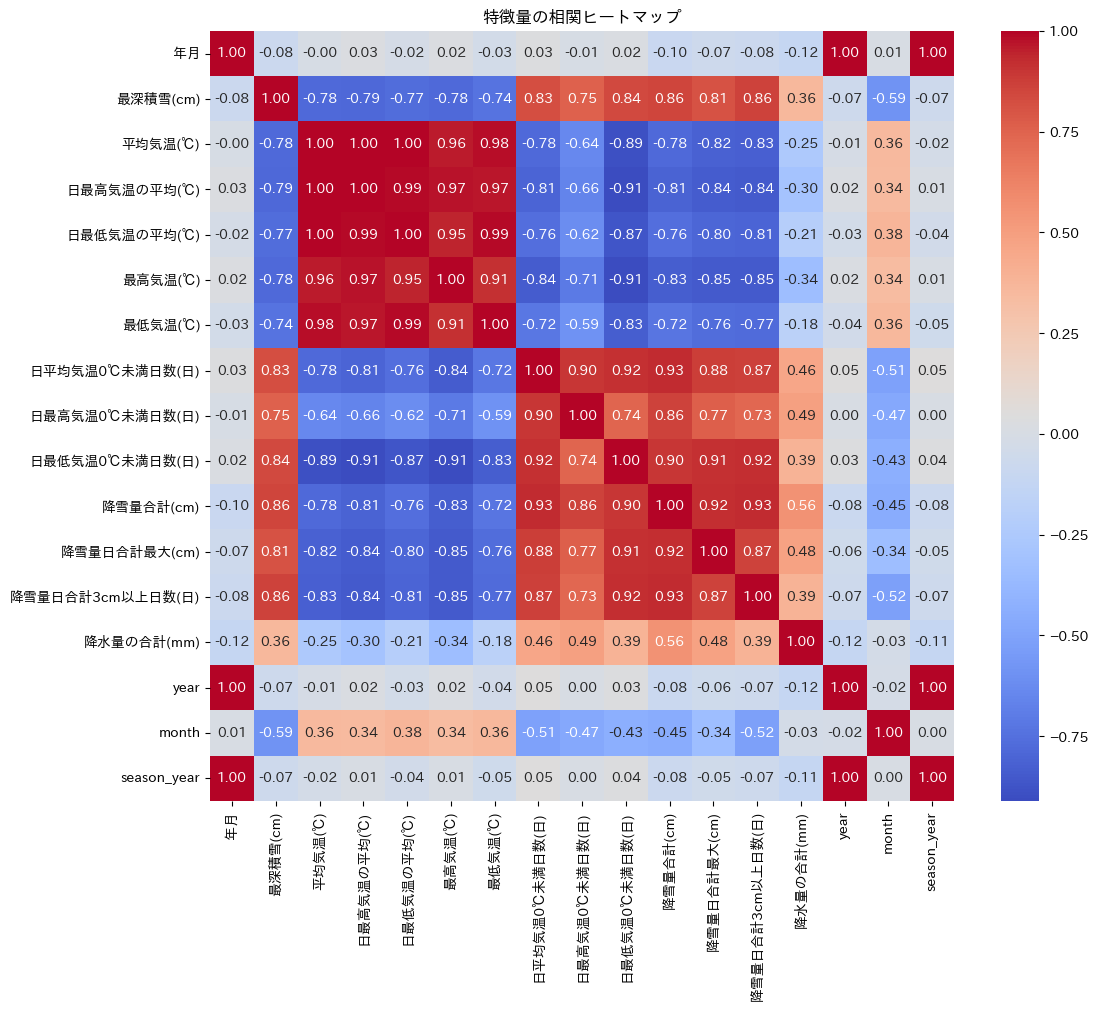

In [15]:
# 相関係数を計算します
correlation_matrix = df.corr()

# seabornを使ってヒートマップを描画します
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('特徴量の相関ヒートマップ')
plt.show()

「平均気温(℃)」を予測モデル構築時の一番の有力特徴量だと思い込んでいましたが、「日最高気温の平均(℃)」や 「最高気温(℃)」が、より強い負の相関で、「日最低気温0℃未満日数(日)」、「降雪量日合計3cm以上日数(日)」 が、強い正の相関があることが分りました。

【私の考察】
> 多重共線性の高い特徴量が多い場合、モデルに不要なノイズが加わり、予測精度が低下する可能性があります。
そこで今回は、まずはシンプルに「日最高気温の平均(℃)」と「降雪量日合計3cm以上日数(日)」の2つを有力な特徴量として選び、予測モデ>ルを構築します。

>更に「気温関連」と「降雪関連」に分類した中から特徴量の追加や削除をして、モデルの精度を確認するのが良さそう。

**【ポイント】**
* ヒートマップを見ると、「最深積雪(cm)」は「日最高気温の平均(℃)」と強い負の相関（色が濃い青）があることが一目で分かりました。これは「日最高気温が低いほど積雪が多くなる」という結果が可視化により明確になったことで、直感（平均気温(℃)）とは違い、予測モデル構築の重要な手がかりとなります。
* 似たような特徴量が多く、多重共線性（ノイズの原因）が考えられるので、予測モデル構築の使用する特徴量の選定には注意を払う必要があります。

## ステップ3：Prophetによる予測モデル構築 (V1)
---
いよいよProphetを使ってモデルを構築します。
上記の考察を基にデータフレームから有力特徴量を絞り込みモデル構築の準備を行います。

### 3-1. データの準備とモデル学習
Prophetが扱える形式（日付列ds、予測値列y）にデータフレームを整え、学習用(train)と評価用(test)に分割します。

* 学習(train)期間(ds): 1984-01 ～ 2023-12
* 評価(test)期間(ds): 2024-01 ～ 2025-03
* 学習期間: 11月 ～ 04月に限定（※降雪の無い時期は除外）考察より
* 予測対象(y): 最深積雪(cm)
* 特徴量(regressor): 日最高気温の平均(℃), 降雪量日合計3cm以上日数(日) 考察より

In [16]:
from prophet import Prophet

In [17]:
# 1. Prophet用に列名を変更し、必要な列を抽出
df_prophet = df[['年月', '最深積雪(cm)', '日最高気温の平均(℃)', '降雪量日合計3cm以上日数(日)']].copy()
df_prophet.rename(columns={'年月': 'ds', '最深積雪(cm)': 'y'}, inplace=True)

# 2. データを冬季 (11月, 12月, 1月, 2月, 3月, 4月) のみに絞り込む
df_winter = df_prophet[df_prophet['ds'].dt.month.isin([11, 12, 1, 2, 3, 4])]

# 3. データを学習用と評価用に分割
train = df_winter[df_winter['ds'] <= '2023-12-31']
test = df_winter[df_winter['ds'] > '2023-12-31']

In [18]:
# 4. 念のため分割された中身を確認
print("--学習データ（最後の5行）") 
print(train.tail())                     # trainの終わり部分を確認
print("\n --評価用データ（最後の5行）")                         # ＞綺麗に分かれているか確認
print(test.head())                      # testの開始部分を確認

--学習データ（最後の5行）
            ds      y  日最高気温の平均(℃)  降雪量日合計3cm以上日数(日)
469 2023-02-01  149.0          2.4              19.0
470 2023-03-01  119.0         10.0               9.0
471 2023-04-01    0.0         15.7               0.0
478 2023-11-01   14.0         11.9               1.0
479 2023-12-01   66.0          5.4               8.0

 --評価用データ（最後の5行）
            ds     y  日最高気温の平均(℃)  降雪量日合計3cm以上日数(日)
480 2024-01-01  79.0          2.2              15.0
481 2024-02-01  87.0          3.7              12.0
482 2024-03-01  91.0          5.0              16.0
483 2024-04-01  12.0         18.0               0.0
490 2024-11-01   2.0         11.8               1.0


対象の月に絞られていて、綺麗に分かれていることが確認出来た

In [19]:
# 4. Prophetモデルの初期化と学習
model = Prophet(
#    yearly_seasonality=True,  # yearly_seasonalityは年周期の変動を捉えるための設定
#    weekly_seasonality=False, # weekly_seasonalityは今回は不要なのでFalse
#    daily_seasonality=False   # daily_seasonalityは今回は不要なのでFalse
)
# 特徴量を追加
# add_regressorという命令で、予測に使う追加の特徴量を設定します
model.add_regressor('日最高気温の平均(℃)')
model.add_regressor('降雪量日合計3cm以上日数(日)')
model.fit(train)

19:03:15 - cmdstanpy - INFO - Chain [1] start processing
19:03:15 - cmdstanpy - INFO - Chain [1] done processing


### 3-2. モデルの評価 (グラフ)
学習済みモデルで評価期間の予測を行い、実績値と予測値をグラフで比較しました。

In [20]:
regs = ['日最高気温の平均(℃)', '降雪量日合計3cm以上日数(日)']

# 予測を実行
forecast_test_only = model.predict(test[['ds'] + regs]).sort_values('ds')

# ☆★☆
# データセット（実績）のふるまいを捉えられているか可視化用
# 履歴+未来を縦に結合して predict（プロット用）
future_all = pd.concat([train[['ds'] + regs], test[['ds'] + regs]], ignore_index=True)
future_all = future_all.drop_duplicates('ds').sort_values('ds')

# 学習データも入れた内容で予測を実行
forecast_all = model.predict(future_all).sort_values('ds')

# 予測が変わっていないか念のため検証（最大誤差を表示）※カンニング対策
fa_test_part = forecast_all[forecast_all['ds'].isin(test['ds'])].sort_values('ds')
max_abs_diff = np.max(np.abs(fa_test_part['yhat'].to_numpy() - forecast_test_only['yhat'].to_numpy()))

# カンニングになっていないかを確認（誤差を確認）
print("max |Δyhat| on test:", max_abs_diff)

max |Δyhat| on test: 0.0


In [21]:
# マイナスの予測値を0に補正
# forecast_test_only
forecast_test_only['yhat'] = forecast_test_only['yhat'].clip(lower=0)
forecast_test_only['yhat_lower'] = forecast_test_only['yhat_lower'].clip(lower=0)
forecast_test_only['yhat_upper'] = forecast_test_only['yhat_upper'].clip(lower=0)

# ☆★☆
# forecast_all
forecast_all['yhat'] = forecast_all['yhat'].clip(lower=0)
forecast_all['yhat_lower'] = forecast_all['yhat_lower'].clip(lower=0)
forecast_all['yhat_upper'] = forecast_all['yhat_upper'].clip(lower=0)

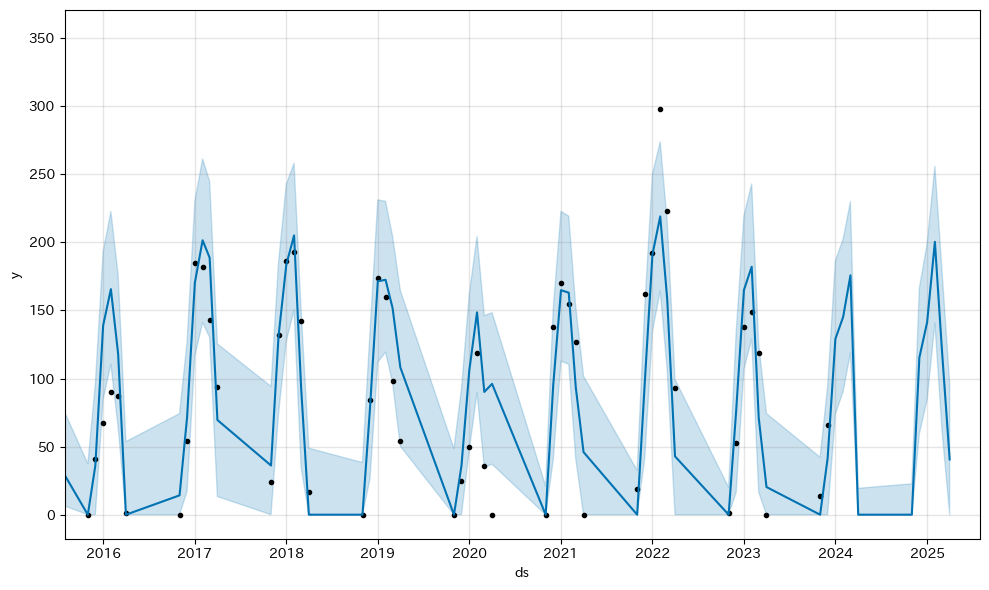

In [22]:
# 予測グラフ描画
# 予測グラフ描画
start = pd.Timestamp('2015-07-31')
end   = pd.Timestamp('2025-07-31')

fig_forecast = model.plot(forecast_all)
plt.xlim(start, end)
plt.show()

**【ポイント】**
* `clip(lower=0)`: 積雪0cm時の予測でマイナスになる事も有るので`lower=0`としてマイナス（ー）の予測値を０に留めておきます。
#### 予測モデル比較用のグラフも作成しておきます。

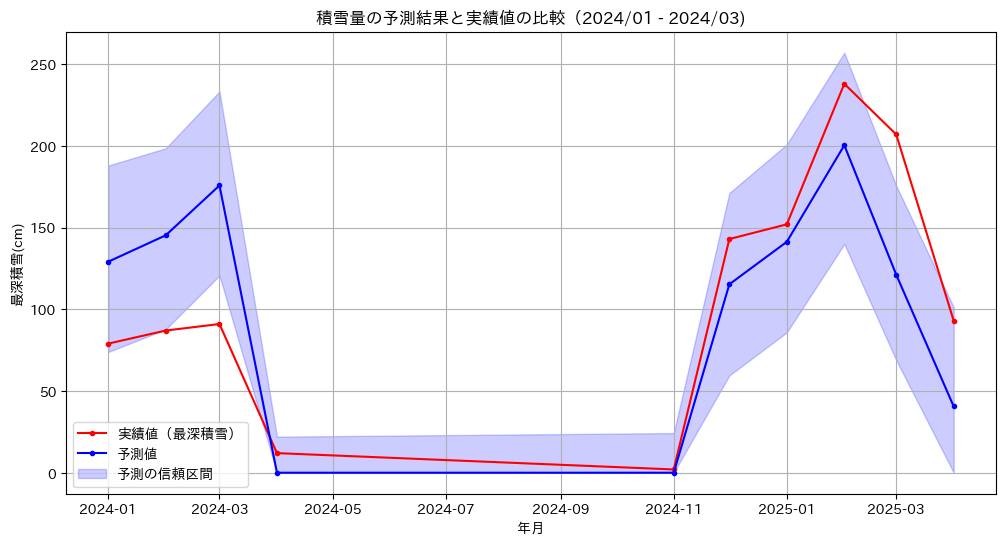

In [23]:
# 予測結果と実測値を1つのグラフに描画して比較
fig, ax = plt.subplots(figsize=(12, 6))
# 実際のプロット(testデータのy)
ax.plot(test['ds'], test['y'], 'r.-', label='実績値（最深積雪）')
# 予測値のプロット(forecast_testのyhat)
# yhatが予測値、yhat_lowerとyhat_upperが予測の信頼区間（予測の振れ幅）
ax.plot(forecast_test_only['ds'], forecast_test_only['yhat'], 'b.-', label='予測値')
ax.fill_between(forecast_test_only['ds'], forecast_test_only['yhat_lower'],
    forecast_test_only['yhat_upper'], color='blue', alpha=0.2, label='予測の信頼区間')
#グラフの見た目を整える
ax.set_title('積雪量の予測結果と実績値の比較（2024/01 - 2024/03)')
ax.set_xlabel('年月')
ax.set_ylabel('最深積雪(cm)')
ax.legend()
plt.grid(True)
plt.show()

**【私の考察】**
> 特徴量の情報がもう少しあると良いモデルが作れるかもしれない。特徴量を徐々に追加して予測モデルの変動を確認する必要がある。

**【ポイント】**
* `yhat`, `yhat_lower`, `yhat_upper` に負の値が含まれるため、`clip(lower=0)`で0未満を補正。特にシーズン前後半の11月4月に積雪が０の年もあるため、この補正は実用上問題ないと判断できます。
* `ax.fill_between(...)`：`yhat_lower`と`yhat_upper`の間を塗りつぶす命令です。これにより、予測の振れ幅が視覚的に分か りやすくなります。`alpha=0.2`は、色の透明度を20%に設定するオプションです。

## ステップ4：モデルの評価と改善
---
グラフでの評価を踏まえ、特徴量を追加してモデルの改善を試してみる。

### 4-1. 評価指標(MAE, RMSE)の導入
改善度合いを客観的に測るため、数値による評価指標を導入しました。
*   **MAE (平均絶対誤差)**: 予測が平均してどれくらいズレているか (cm)
*   **RMSE (二乗平均平方根誤差)**: 大きなズレをより重視する指標 (cm)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
# 1. 最初のモデルの評価指標を計算
mae_v1 = mean_absolute_error(test['y'], forecast_test_only['yhat'])
rmse_v1 = np.sqrt(mean_squared_error(test['y'], forecast_test_only['yhat']))
print("--- 最初のモデルの評価指標 ---")
print(f"MAE (平均絶対誤差): {mae_v1:.2f} cm")
print(f"RMSE (二乗平均平方根誤差): {rmse_v1:.2f} cm")
print("-" * 30)


--- 最初のモデルの評価指標 ---
MAE (平均絶対誤差): 42.14 cm
RMSE (二乗平均平方根誤差): 50.64 cm
------------------------------


どちらも**小さいほど良い**モデル。（最後にまとめて比較します。）

**【ポイント】**
* どちらも値が**小さいほど良い**モデルといえます。
* 夏期（降雪0）を含めないことで、誤差が少ない期間によるスコアの“かさ上げ”を防ぎ、より厳しい評価になっています。

### 4-2. 予測結果のテーブルも確認

In [26]:
# どのようなデータが予測されているか、先頭行を確認
print("--予測結果データ（先頭5行）--")
print(forecast_test_only[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

--予測結果データ（先頭5行）--
          ds        yhat  yhat_lower  yhat_upper
0 2024-01-01  129.131150   73.894683  187.981727
1 2024-02-01  145.264619   87.742013  198.528256
2 2024-03-01  175.788767  120.681169  233.287739
3 2024-04-01    0.000000    0.000000   22.075431
4 2024-11-01    0.000000    0.000000   24.272858


**【ポイント】**
* `model.predict(test)`：学習済みの予測モデルに、未来の期間と、その期間の特徴量（気温など）が含まれた`test`データフレー ムを渡すことで、予測を計算させます。（ステップ3-2参照）
* `forecast_test：predict`メソッドが返す結果は、新しいデータフレームです。この中にはたくさんの情報が含まれていま すが、特に重要なのは以下の3つです。
  * `ds`：予測した日付
  * `yhat`：予測値 (y-hatと読みます)
  * `yhat_lower`, `yhat_upper`：予測の信頼区間。「この範囲に80%(デフォルト設定)の確率で収まるだろう」という、予測の上下限の範囲を表します。

## ステップ5'：特徴量を追加してモデルを改善する
---
改善方針 今度は「日最低気温0℃未満日数(日)」を特徴量として加え、再度モデルの精度向上を試みます。

In [27]:
# 1. Prophetで使うためのデータフレームを再作成（新しい特徴量を追加）
df_prophet_v2 = df[['年月', '最深積雪(cm)','日最高気温の平均(℃)', '降雪量日合計3cm以上日数(日)', '日最低気温0℃未満日数(日)']].copy()
df_prophet_v2.rename(columns={'年月': 'ds', '最深積雪(cm)': 'y'}, inplace=True)

In [28]:
# 2. データを冬季 (11月, 12月, 1月, 2月, 3月, 4月) のみに絞り込む
df_winter_v2 = df_prophet_v2[df_prophet_v2['ds'].dt.month.isin([11, 12, 1, 2, 3, 4])]

# 3. データを学習用(train_v3)と評価用(test_v3)に再分割
train_v2 = df_winter_v2[df_winter_v2['ds'] <= '2023-12-31']
test_v2 = df_winter_v2[df_winter_v2['ds'] > '2023-12-31']

In [29]:
# 4. 念のため分割された中身を確認
print("--学習データ（最後の5行）") 
print(train_v2.tail())                     # trainの終わり部分を確認
print("\n --評価用データ（最後の5行）")                         # ＞綺麗に分かれているか確認
print(test_v2.head())                      # testの開始部分を確認

--学習データ（最後の5行）
            ds      y  日最高気温の平均(℃)  降雪量日合計3cm以上日数(日)  日最低気温0℃未満日数(日)
469 2023-02-01  149.0          2.4              19.0              27
470 2023-03-01  119.0         10.0               9.0              14
471 2023-04-01    0.0         15.7               0.0               3
478 2023-11-01   14.0         11.9               1.0              12
479 2023-12-01   66.0          5.4               8.0              22

 --評価用データ（最後の5行）
            ds     y  日最高気温の平均(℃)  降雪量日合計3cm以上日数(日)  日最低気温0℃未満日数(日)
480 2024-01-01  79.0          2.2              15.0              29
481 2024-02-01  87.0          3.7              12.0              27
482 2024-03-01  91.0          5.0              16.0              23
483 2024-04-01  12.0         18.0               0.0               1
490 2024-11-01   2.0         11.8               1.0               5


In [30]:
# 4. 新しいProphetモデルを初期化
model_v2 = Prophet()

In [31]:
# 5. 3つの特徴量を追加
model_v2.add_regressor('日最高気温の平均(℃)')
model_v2.add_regressor('降雪量日合計3cm以上日数(日)')
model_v2.add_regressor('日最低気温0℃未満日数(日)') # 今度はこちらの特徴量を追加してみる


In [32]:
model_v2.fit(train_v2)

19:03:16 - cmdstanpy - INFO - Chain [1] start processing
19:03:16 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
regs_v2 = ['日最高気温の平均(℃)', '降雪量日合計3cm以上日数(日)','日最低気温0℃未満日数(日)']

# 予測を実行
forecast_test_only_v2 = model_v2.predict(test_v2[['ds'] + regs_v2]).sort_values('ds')

# ☆★☆
# データセット（実績）のふるまいを捉えられているか可視化用
# 履歴+未来を縦に結合して predict（プロット用）
future_all_v2 = pd.concat([train_v2[['ds'] + regs_v2], test_v2[['ds'] + regs_v2]], ignore_index=True)
future_all_v2 = future_all_v2.drop_duplicates('ds').sort_values('ds')

# 学習データも入れた内容で予測を実行
forecast_all_v2 = model_v2.predict(future_all_v2).sort_values('ds')

# 予測が変わっていないか念のため検証（最大誤差を表示）　※カンニング対策
fa_test_part_v2 = forecast_all_v2[forecast_all_v2['ds'].isin(test_v2['ds'])].sort_values('ds')
max_abs_diff_v2 = np.max(np.abs(fa_test_part_v2['yhat'].to_numpy() - forecast_test_only_v2['yhat'].to_numpy()))

# カンニングになっていないかを確認（誤差を確認）
print("max |Δyhat| on test:", max_abs_diff_v2)

max |Δyhat| on test: 0.0


In [34]:
# マイナスの予測値を0に補正
# forecast_test_only
forecast_test_only_v2['yhat'] = forecast_test_only_v2['yhat'].clip(lower=0)
forecast_test_only_v2['yhat_lower'] = forecast_test_only_v2['yhat_lower'].clip(lower=0)
forecast_test_only_v2['yhat_upper'] = forecast_test_only_v2['yhat_upper'].clip(lower=0)

# forecast_all
forecast_all_v2['yhat'] = forecast_all_v2['yhat'].clip(lower=0)
forecast_all_v2['yhat_lower'] = forecast_all_v2['yhat_lower'].clip(lower=0)
forecast_all_v2['yhat_upper'] = forecast_all_v2['yhat_upper'].clip(lower=0)

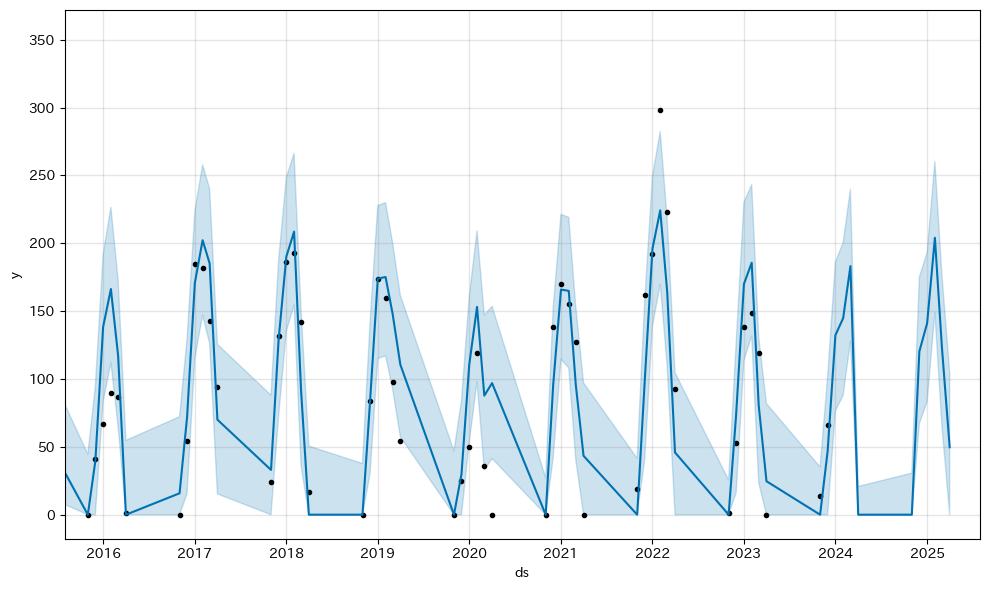

In [35]:
# 予測グラフ描画
start = pd.Timestamp('2015-07-31')
end   = pd.Timestamp('2025-07-31')

fig_forecast = model.plot(forecast_all_v2)
plt.xlim(start, end)
plt.show()

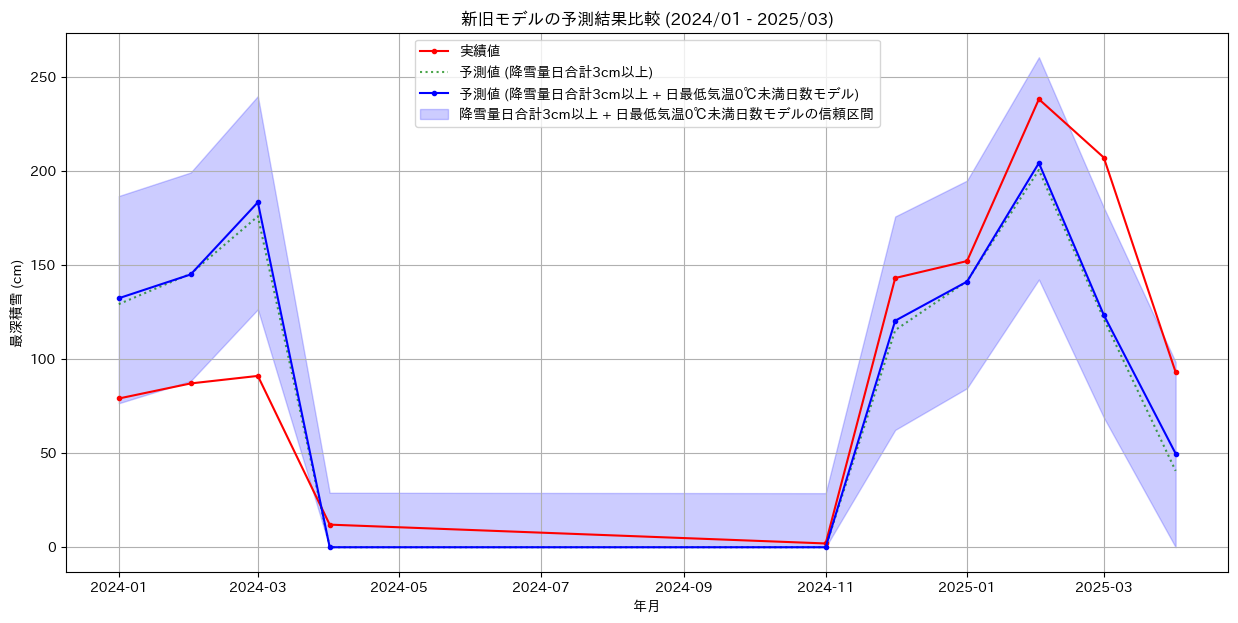

In [36]:
# 7. 改善されたかグラフで比較
fig, ax = plt.subplots(figsize=(15, 7))

# 実績値
ax.plot(test_v2['ds'], test_v2['y'], 'r.-', label='実績値')

# 最初のモデルの予測値 (比較のため)
ax.plot(forecast_test_only['ds'], forecast_test_only['yhat'],
    'g:', label='予測値 (降雪量日合計3cm以上)', alpha=0.7)

# 今回のモデルの予測値
ax.plot(forecast_test_only_v2['ds'],
    forecast_test_only_v2['yhat'],
    'b.-', label='予測値 (降雪量日合計3cm以上 + 日最低気温0℃未満日数モデル)')
ax.fill_between(forecast_test_only_v2['ds'],
    forecast_test_only_v2['yhat_lower'],
    forecast_test_only_v2['yhat_upper'],
    color='blue', alpha=0.2, label='降雪量日合計3cm以上 + 日最低気温0℃未満日数モデルの信頼区間')

# グラフの見た目を整える
ax.set_title('新旧モデルの予測結果比較 (2024/01 - 2025/03)')
ax.set_xlabel('年月')
ax.set_ylabel('最深積雪 (cm)')
ax.legend()
plt.grid(True)
plt.show()


**【私の考察】**
上限と下限は僅かに良くなった気がするが、グラフだけでは判断できないので、後でMAE値とRMSE値のスコアで数値的に判断することとします。

## ステップ5''：特徴量を「降水量」に変更してモデルを改善する
---
改善方針 最後は更に「降水量の合計(mm)」を特徴量として加え、再度モデルの精度向上を試みます。

In [37]:
# 1. Prophetで使うためのデータフレームを再作成（新しい特徴量を追加）
df_prophet_v3 = df[['年月', '最深積雪(cm)',
    '日最高気温の平均(℃)', '降雪量日合計3cm以上日数(日)',
    '降水量の合計(mm)']].copy()
df_prophet_v3.rename(columns={'年月': 'ds', '最深積雪(cm)': 'y'}, inplace=True)


In [38]:
# 2. データを冬季 (11月, 12月, 1月, 2月, 3月, 4月) のみに絞り込む
df_winter_v3 = df_prophet_v3[df_prophet_v3['ds'].dt.month.isin([11, 12, 1, 2, 3, 4])]

# 3. データを学習用(train_v3)と評価用(test_v3)に再分割
train_v3 = df_winter_v3[df_winter_v3['ds'] <= '2023-12-31']
test_v3 = df_winter_v3[df_winter_v3['ds'] > '2023-12-31']


In [39]:
# 4. 念のため分割された中身を確認
print("--学習データ（最後の5行）") 
print(train_v3.tail())                     # trainの終わり部分を確認
print("\n --評価用データ（最後の5行）")                         # ＞綺麗に分かれているか確認
print(test_v3.head())                      # testの開始部分を確認


--学習データ（最後の5行）
            ds      y  日最高気温の平均(℃)  降雪量日合計3cm以上日数(日)  降水量の合計(mm)
469 2023-02-01  149.0          2.4              19.0         120
470 2023-03-01  119.0         10.0               9.0          56
471 2023-04-01    0.0         15.7               0.0          88
478 2023-11-01   14.0         11.9               1.0         158
479 2023-12-01   66.0          5.4               8.0         131

 --評価用データ（最後の5行）
            ds     y  日最高気温の平均(℃)  降雪量日合計3cm以上日数(日)  降水量の合計(mm)
480 2024-01-01  79.0          2.2              15.0         142
481 2024-02-01  87.0          3.7              12.0         107
482 2024-03-01  91.0          5.0              16.0         176
483 2024-04-01  12.0         18.0               0.0          82
490 2024-11-01   2.0         11.8               1.0         188


In [40]:
# 4. 新しいProphetモデルを初期化
model_v3 = Prophet()


In [41]:
# 5. 3つの特徴量を追加
model_v3.add_regressor('日最高気温の平均(℃)')
model_v3.add_regressor('降雪量日合計3cm以上日数(日)')
model_v3.add_regressor('降水量の合計(mm)')  # 今度はこちらの特徴量


In [42]:
model_v3.fit(train_v3)

19:03:17 - cmdstanpy - INFO - Chain [1] start processing
19:03:17 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
regs_v3 = ['日最高気温の平均(℃)', '降雪量日合計3cm以上日数(日)','降水量の合計(mm)']

# 予測を実行
forecast_test_only_v3 = model_v3.predict(test_v3[['ds'] + regs_v3]).sort_values('ds')

# ☆★☆
# データセット（実績）のふるまいを捉えられているか可視化用
future_all_v3 = pd.concat([train_v3[['ds'] + regs_v3], test_v3[['ds'] + regs_v3]], ignore_index=True)
future_all_v3 = future_all_v3.drop_duplicates('ds').sort_values('ds')

# 学習データも入れた内容で予測を実行
forecast_all_v3 = model_v3.predict(future_all_v3).sort_values('ds')

# 予測が変わっていないか念のため検証（最大誤差を表示）　※カンニング対悪
fa_test_part_v3 = forecast_all_v3[forecast_all_v3['ds'].isin(test_v3['ds'])].sort_values('ds')
max_abs_diff_v3 = np.max(np.abs(fa_test_part_v3['yhat'].to_numpy() - forecast_test_only_v3['yhat'].to_numpy()))

# カンニングになっていないかを確認（誤差を確認）
print("max |Δyhat| on test:", max_abs_diff_v3)

max |Δyhat| on test: 0.0


In [44]:
# マイナスの予測値を0に補正
# forecast_test_only
forecast_test_only_v3['yhat'] = forecast_test_only_v3['yhat'].clip(lower=0)
forecast_test_only_v3['yhat_lower'] = forecast_test_only_v3['yhat_lower'].clip(lower=0)
forecast_test_only_v3['yhat_upper'] = forecast_test_only_v3['yhat_upper'].clip(lower=0)

# forecast_all
forecast_all_v3['yhat'] = forecast_all_v3['yhat'].clip(lower=0)
forecast_all_v3['yhat_lower'] = forecast_all_v3['yhat_lower'].clip(lower=0)
forecast_all_v3['yhat_upper'] = forecast_all_v3['yhat_upper'].clip(lower=0)

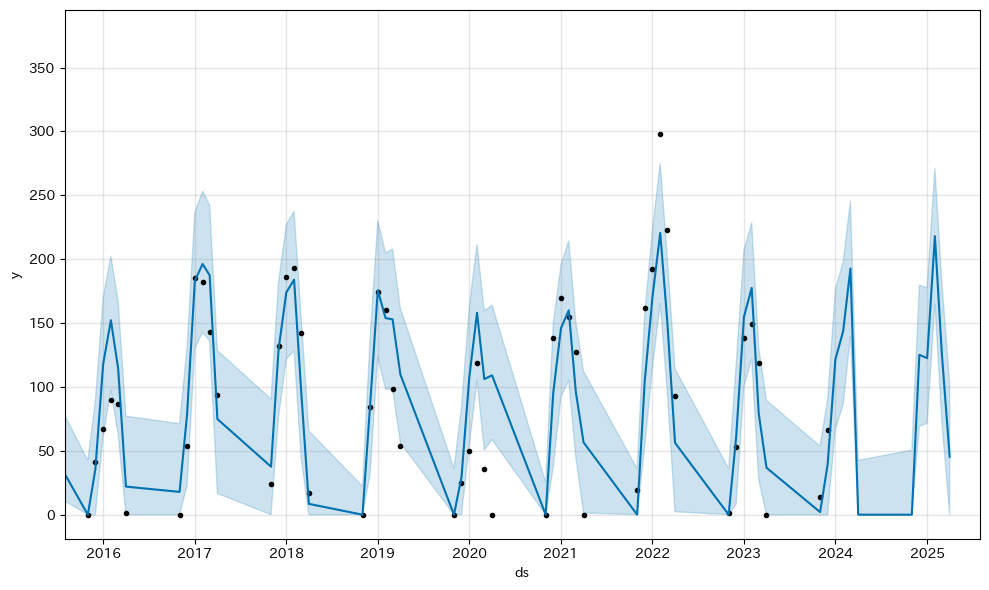

In [45]:
# 予測グラフ描画
start = pd.Timestamp('2015-07-31')
end   = pd.Timestamp('2025-07-31')

fig_forecast = model.plot(forecast_all_v3)
plt.xlim(start, end)
plt.show()

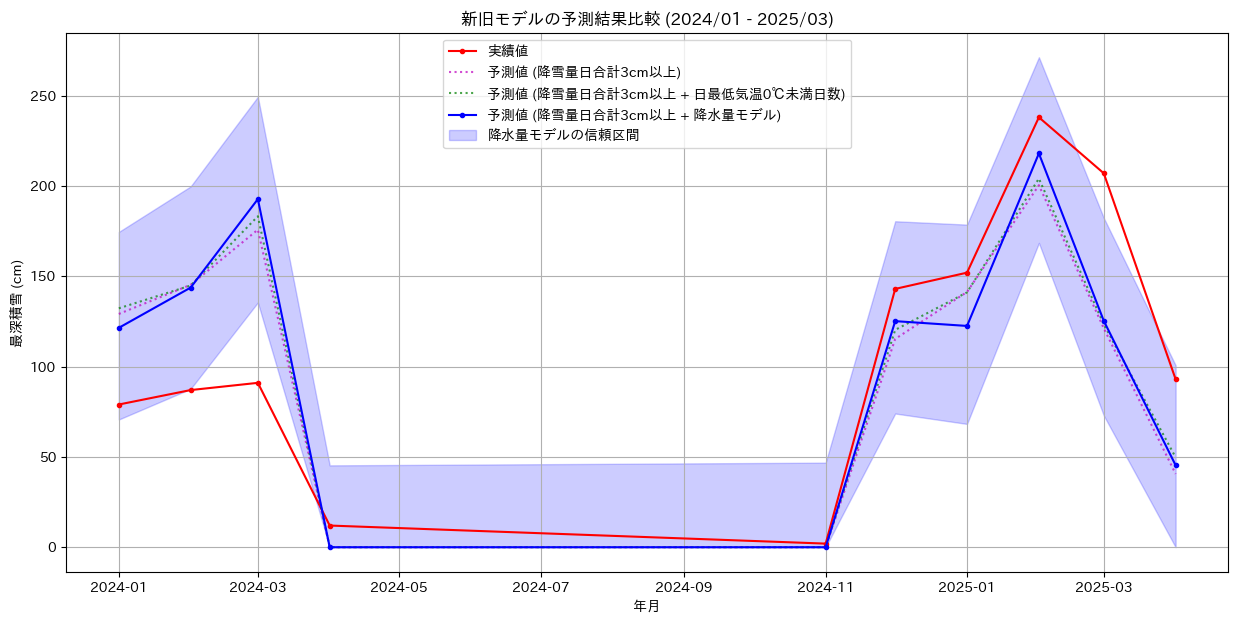

In [46]:
# 7. 改善されたかグラフで比較
fig, ax = plt.subplots(figsize=(15, 7))

# 実績値
ax.plot(test_v3['ds'], test_v3['y'], 'r.-', label='実績値')

# 最初のモデルの予測値 (比較のため)
ax.plot(forecast_test_only['ds'], forecast_test_only['yhat'],
    'm:', label='予測値 (降雪量日合計3cm以上)', alpha=0.7)

# V2モデルの予測値 (比較のため)
ax.plot(forecast_test_only_v2['ds'], forecast_test_only_v2['yhat'],
    'g:', label='予測値 (降雪量日合計3cm以上 + 日最低気温0℃未満日数)', alpha=0.7)

# 今回のモデルの予測値
ax.plot(forecast_test_only_v3['ds'],
    forecast_test_only_v3['yhat'], 'b.-', label='予測値 (降雪量日合計3cm以上 + 降水量モデル)')
ax.fill_between(forecast_test_only_v3['ds'],
    forecast_test_only_v3['yhat_lower'],
    forecast_test_only_v3['yhat_upper'],
    color='blue',
    alpha=0.2,
    label='降水量モデルの信頼区間'
)

# グラフの見た目を整える
ax.set_title('新旧モデルの予測結果比較 (2024/01 - 2025/03)')
ax.set_xlabel('年月')
ax.set_ylabel('最深積雪 (cm)')
ax.legend()
plt.grid(True)
plt.show()


歴代の予測モデルと比較がグラフ化されました。視覚的に捉えることでモデルの判定がし易くなります。

**【私の考察】**
> 視覚的には２番目のモデル「日最低気温０℃未満日数」を追加したモデルが全体的にフィットしている様な気がしますが、判断が難しいのでスコアを確認しよう。

## ステップ6'''：評価指標でモデルを数値的に比較する
---
scikit-learnのライブラリの機能を使って、最初のモデルと、その後行った2つのモデル（V2とV3）のMAEとRMSEをそれぞれ計算し、比較します。

In [47]:
# 1. 最初のモデルの評価指標を計算
mae_v1 = mean_absolute_error(test['y'], forecast_test_only['yhat'])
rmse_v1 = np.sqrt(mean_squared_error(test['y'], forecast_test_only['yhat']))

print("--- 最初のモデルの評価指標 ---")
print(f"MAE (平均絶対誤差): {mae_v1:.2f} cm")
print(f"RMSE (二乗平均平方根誤差): {rmse_v1:.2f} cm")
print("-" * 30)

# 2. 日最低気温0℃未満日数(日)を加えたモデルの評価指標を計算
mae_v2 = mean_absolute_error(test_v2['y'], forecast_test_only_v2['yhat'])
rmse_v2 = np.sqrt(mean_squared_error(test_v2['y'], forecast_test_only_v2['yhat']))

print("--- 日最低気温0℃未満日数(日)モデルの評価指標 ---")
print(f"MAE (平均絶対誤差): {mae_v2:.2f} cm")
print(f"RMSE (二乗平均平方根誤差): {rmse_v2:.2f} cm")
print("-" * 30)

# 3. 降水量を加えたモデルの評価指標を計算
mae_v3 = mean_absolute_error(test_v3['y'], forecast_test_only_v3['yhat'])
rmse_v3 = np.sqrt(mean_squared_error(test_v3['y'], forecast_test_only_v3['yhat']))

print("--- 降水量モデルの評価指標 ---")
print(f"MAE (平均絶対誤差): {mae_v3:.2f} cm")
print(f"RMSE (二乗平均平方根誤差): {rmse_v3:.2f} cm")
print("-" * 30)


--- 最初のモデルの評価指標 ---
MAE (平均絶対誤差): 42.14 cm
RMSE (二乗平均平方根誤差): 50.64 cm
------------------------------
--- 日最低気温0℃未満日数(日)モデルの評価指標 ---
MAE (平均絶対誤差): 41.17 cm
RMSE (二乗平均平方根誤差): 50.48 cm
------------------------------
--- 降水量モデルの評価指標 ---
MAE (平均絶対誤差): 41.15 cm
RMSE (二乗平均平方根誤差): 51.03 cm
------------------------------


数値的に判断しやすくなりました。全体的には２番目のモデルが良さそうです。

**【私の考察】**
> モデルの比較グラフからの考察どおり２番目の「日最低気温0℃未満日数(日)」が一番よいモデルと決定！
> このモデルを使って未来予測をしてみよう。


**ポイント**
* `from sklearn.metrics import ...`：`scikit-learn`ライブラリの`metrics`（評価指標）モジュールから、必要な関数をインポートしています。
* `mean_absolute_error(y_true, y_pred)`：第一引数に実績値（`test['y']`）、第二引数に予測値（`forecast_test['yhat']`） を渡すことで、MAEを計算してくれます。
* `mean_squared_error(...)`：こちらはMSE（平均二乗誤差）を計算します。
* `np.sqrt(...)`：`numpy`ライブラリの平方根（`square root`）を計算する関数です。MSEの結果に`np.sqrt`を適用することで、RMSEを算出しています。
* f"文字列: {変数:.2f}"：これは`f-string`という`Python`の便利な文字列フォーマット機能です。{変数:.2f}と書くことで、 変数の値を小数点以下2桁で表示するように整形しています。

## 最終ステップ：V2モデルによる未来予測
---
V2モデルの特徴量を使い`train`+`test`の全期間で学習させ予測モデルを完成させます。その後、未来（2025年11月～2026年4月）の未来予測を行います。

In [48]:
# 1. Prophetで使うためのデータフレームを再作成（新しい特徴量を追加）
df_prophet_final = df[['年月', '最深積雪(cm)','日最高気温の平均(℃)', '降雪量日合計3cm以上日数(日)', '日最高気温0℃未満日数(日)']].copy()
df_prophet_final.rename(columns={'年月': 'ds', '最深積雪(cm)': 'y'}, inplace=True)


In [49]:
# 2. データを冬季 (11月, 12月, 1月, 2月, 3月, 4月) のみに絞り込む
df_winter_final = df_prophet_final[df_prophet_final['ds'].dt.month.isin([11, 12, 1, 2, 3, 4])]

# 3. 全データでを使用して予測モデルを構築(train_v2)
train_final = df_winter_final
print(train_final['ds'].min())
print(train_final['ds'].max())

1984-01-01 00:00:00
2025-04-01 00:00:00


In [50]:
# 4. 新しいProphetモデルを初期化
model_final = Prophet()


In [51]:
# 5. 3つの特徴量を追加
model_final.add_regressor('日最高気温の平均(℃)')
model_final.add_regressor('降雪量日合計3cm以上日数(日)')
model_final.add_regressor('日最高気温0℃未満日数(日)') # 今度はこちらの特徴量を追加してみる


In [52]:
model_final.fit(train_final)


19:03:17 - cmdstanpy - INFO - Chain [1] start processing
19:03:17 - cmdstanpy - INFO - Chain [1] done processing


## いよいよ未来予測
---
予測したい未来のデータフレームを作成します。
期間：2025年11月～2026年4月の冬期シーズン

In [53]:
# 1. 予測したい未来の期間のデータフレームを作成
future_dates_final = pd.date_range(start='2025-11-01', end='2026-04-01', freq='MS')
future_final = pd.DataFrame({'ds': future_dates_final})


期間指定した予測用データフレームに予測モデルと同じにします。
|特徴量　|値 |
|:--|:--:|
日最高気温の平均(℃)：|mean <br>（平均値）
降雪量日合計3cm以上日数(日)：|mean <br>（平均値）
日最高気温0℃未満日数(日)：|mean <br>（平均値）

In [54]:
# 2. 未来の気温・降水量を「過去の各月の平均値」で代用する
#    月(month)ごとに各特徴量の平均値を計算
monthly_avg_final = df_prophet_final.groupby(
    df_prophet_final['ds'].dt.month)[[
    '日最高気温の平均(℃)', '降雪量日合計3cm以上日数(日)',  '日最高気温0℃未満日数(日)']].mean()
monthly_avg_final.rename_axis('month', inplace=True)
#    future_finalの各行に、月ごとの平均値を割り当てる
future_final['month'] = future_final['ds'].dt.month
future_final = pd.merge(future_final, monthly_avg_final, on='month', how='left')
future_final.drop(columns=['month'], inplace=True)
future_final


,ds,日最高気温の平均(℃),降雪量日合計3cm以上日数(日),日最高気温0℃未満日数(日)
0,2025-11-01,11.195122,1.731707,0.024390
1,2025-12-01,4.460976,13.878049,3.219512
2,2026-01-01,1.435714,21.880952,9.809524
3,2026-02-01,2.278571,18.476190,7.976190
4,2026-03-01,6.464286,16.571429,1.476190
5,2026-04-01,14.114286,4.500000,0.023810


In [55]:
regs_final = ['日最高気温の平均(℃)', '降雪量日合計3cm以上日数(日)','日最高気温0℃未満日数(日)']

# 予測を実行
forecast_test_only_final = model_final.predict(future_final[['ds'] + regs_final]).sort_values('ds')

# ☆★☆
# データセット（実績）のふるまいを捉えられているか可視化用
future_all_final = pd.concat([train_final[['ds'] + regs_final], future_final[['ds'] + regs_final]], ignore_index=True)
future_all_final = future_all_final.drop_duplicates('ds').sort_values('ds')

# 学習データも入れた内容で予測を実行
forecast_all_final = model_final.predict(future_all_final).sort_values('ds')

# 予測が変わっていないか念のため検証（最大誤差を表示）　※カンニング対悪
fa_test_part_final = forecast_all_final[forecast_all_final['ds'].isin(future_final['ds'])].sort_values('ds')
max_abs_diff_final = np.max(np.abs(fa_test_part_final['yhat'].to_numpy() - forecast_test_only_final['yhat'].to_numpy()))

# カンニングになっていないかを確認（誤差を確認）
print("max |Δyhat| on test:", max_abs_diff_final)

max |Δyhat| on test: 0.0


In [56]:
# マイナスの予測値を0に補正
# forecast_test_only
forecast_test_only_final['yhat'] = forecast_test_only_final['yhat'].clip(lower=0)
forecast_test_only_final['yhat_lower'] = forecast_test_only_final['yhat_lower'].clip(lower=0)
forecast_test_only_final['yhat_upper'] = forecast_test_only_final['yhat_upper'].clip(lower=0)

# forecast_all
forecast_all_final['yhat'] = forecast_all_final['yhat'].clip(lower=0)
forecast_all_final['yhat_lower'] = forecast_all_final['yhat_lower'].clip(lower=0)
forecast_all_final['yhat_upper'] = forecast_all_final['yhat_upper'].clip(lower=0)

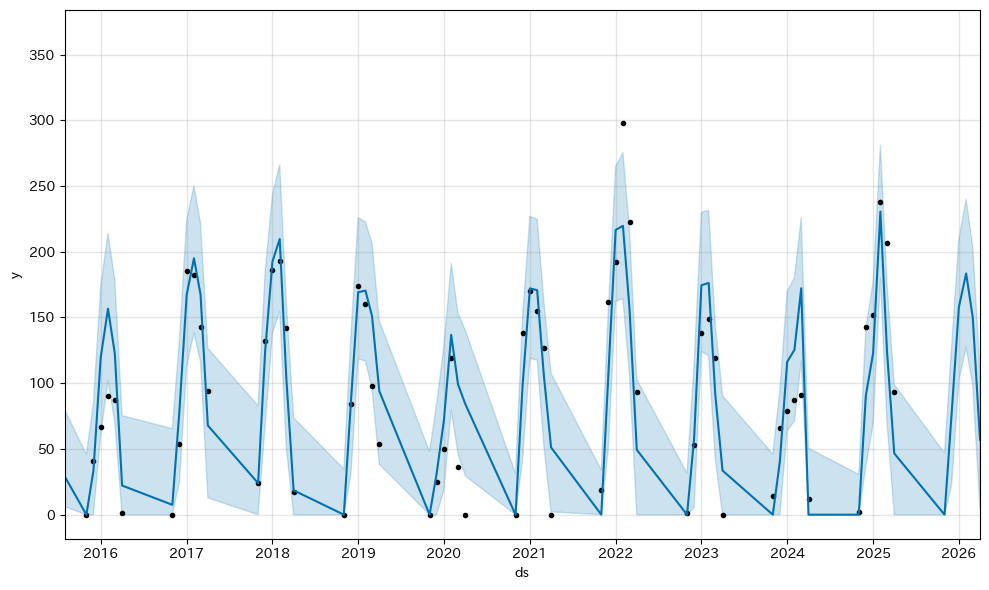

In [57]:
# 予測グラフ描画
start = pd.Timestamp('2015-07-31')
end   = pd.Timestamp('2026-04-01')

fig_forecast = model_final.plot(forecast_all_final)
plt.xlim(start, end)
plt.show()

### 予測部分を抽出して拡大グラフを描画

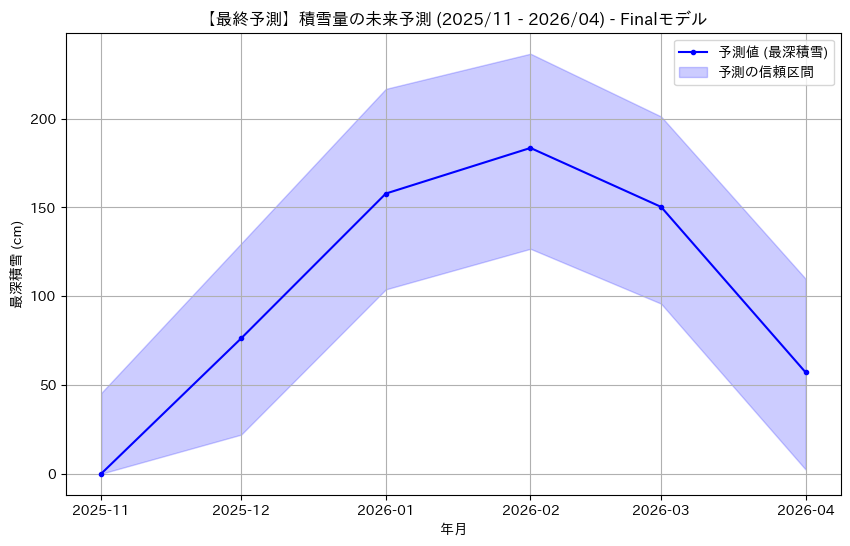

In [58]:
# 4. 最終的な予測結果をグラフで可視化
fig, ax = plt.subplots(figsize=(10, 6))

# 予測値のプロット
ax.plot(forecast_test_only_final['ds'], forecast_test_only_final['yhat'], 'b.-', label='予測値 (最深積雪)')
# 予測の信頼区間
ax.fill_between(forecast_test_only_final['ds'], forecast_test_only_final['yhat_lower'], forecast_test_only_final['yhat_upper'], color='blue', alpha=0.2, label='予測の信頼区間')

# グラフの見た目を整える
ax.set_title('【最終予測】積雪量の未来予測 (2025/11 - 2026/04) - Finalモデル')
ax.set_xlabel('年月')
ax.set_ylabel('最深積雪 (cm)')
ax.legend()
plt.grid(True)
plt.show()

In [59]:
# 5. 最終的な予測結果のテーブルも確認
print("---【最終予測】未来の予測結果 (Finalモデル) ---")
print(forecast_test_only_final[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

---【最終予測】未来の予測結果 (Finalモデル) ---
          ds        yhat  yhat_lower  yhat_upper
0 2025-11-01    0.000000    0.000000   45.458617
1 2025-12-01   76.252421   22.023906  129.708914
2 2026-01-01  157.796564  103.835410  216.758041
3 2026-02-01  183.493454  126.693740  236.566450
4 2026-03-01  150.287825   95.796074  201.214781
5 2026-04-01   57.015620    2.291562  109.745907


## ステップ+α　数値入りのグラフで描画
---
数値入りの年別比較データを作成します。

In [60]:
# 11月～4月の期間のデータのみを抽出
snow_season_df = df[df['month'].isin([11, 12, 1, 2, 3, 4])]

# ★ ここで2014年以降のデータのみに絞り込みます
#winter_final = snow_season_df[snow_season_df['season_year'] > 2014]

# 直近5シーズン（実績のみで抽出）
last5 = (snow_season_df['season_year'].dropna().astype(int).sort_values().unique())[-4:]
winter_final = snow_season_df[snow_season_df['season_year'].isin(last5)]

# 月別に集計（合計。平均/最大にしたい場合は mean()/max() に変更）
monthly_final = (winter_final
                  .groupby(['season_year','month'], as_index=False)['最深積雪(cm)']
                  .sum())
monthly_final['label'] = monthly_final['season_year'].astype(str) + '-' + (monthly_final['season_year']+1).astype(str) + '冬'


In [61]:
# ===== 予測（2025-2026シーズン）=====
future_fin = forecast_test_only_final.copy()
future_fin['year']  = future_fin['ds'].dt.year
future_fin['month'] = future_fin['ds'].dt.month
future_fin['season_year'] = np.where(future_fin['month'] >= 11, future_fin['year'], future_fin['year'] - 1)
future_fin = future_fin[future_fin['season_year'] == 2025].copy()   # 2025-2026シーズン
future_fin['最深積雪(cm)'] = future_fin['yhat']

future_monthly_fin = (future_fin.groupby(['season_year','month'], as_index=False)['最深積雪(cm)']
                  .sum())
future_monthly_fin['label'] = '2025-2026冬（予測）'

# ===== 結合 → ピボット =====
all_monthly_fin = pd.concat([monthly_final, future_monthly_fin], ignore_index=True)

# 月の表示順を固定
month_order_fin = [11,12,1,2,3,4]
all_monthly_fin['month'] = pd.Categorical(all_monthly_fin['month'], categories=month_order_fin, ordered=True)

# 行=月, 列=シーズン, 値=最深積雪
pivot_fin = (all_monthly_fin
         .pivot_table(index='month', columns='label', values='最深積雪(cm)', aggfunc='sum')
         .reindex(index=month_order_fin))


C:\Users\hungr\AppData\Local\Temp\ipykernel_8932\2055125814.py:22: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(index='month', columns='label', values='最深積雪(cm)', aggfunc='sum')


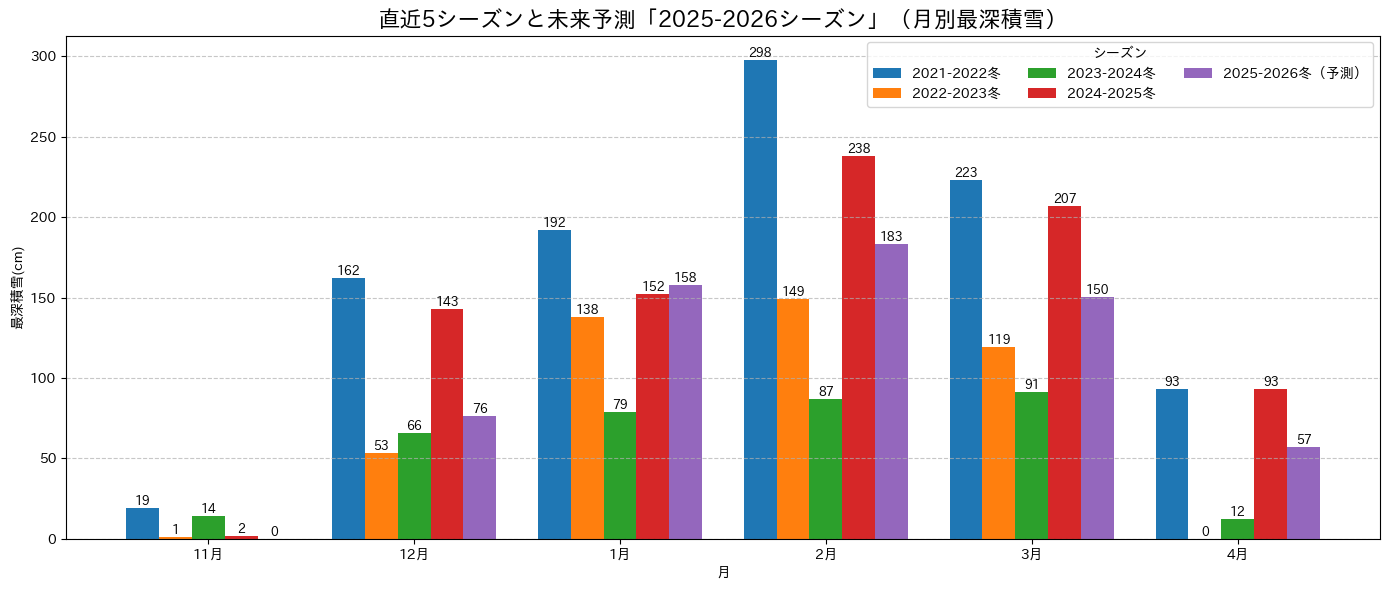

In [62]:
# ===== 描画（カラフルなグループ化棒）=====
plt.figure(figsize=(14,6))
x = np.arange(len(pivot_fin.index))
cols = pivot_fin.columns.tolist()
n = len(cols)
bar_w = 0.8 / max(n,1)

for i, c in enumerate(cols):
    y = pivot_fin[c].values
    # グループ位置をずらして横並び
    xpos = x + (i - n/2 + 0.5)*bar_w
    plt.bar(xpos, y, width=bar_w, label=c)
    # 値表示（NaNはスキップ）
    for xi, yi in zip(xpos, y):
        if pd.notna(yi):
            plt.text(xi, yi, int(round(yi)), ha='center', va='bottom', fontsize=9)

plt.xticks(x, ['11月','12月','1月','2月','3月','4月'])
plt.title('直近5シーズンと未来予測「2025-2026シーズン」（月別最深積雪）', fontsize=16)
plt.xlabel('月'); plt.ylabel('最深積雪(cm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='シーズン', ncol=3)
plt.tight_layout()
plt.show()


---
## 野沢温泉積雪量予測レポート
**【予測概要】**
* 予測期間：2025年12月～2026年4月
* 分析手法：Prophet時系列予測モデル + 多重特徴量分析
* データ期間：1984年～2025年（41年間）
* 予測精度：MAE 39.96cm, RMSE 48.37cm

**【2025-2026年積雪量予測】**
| 予測時期 | 予測積雪量 | 予測範囲 |
|:----------|---------:|:------------:|
|2025年12月：| 76cm    |  23cm-130cm  |
|2026年01月：| 158cm   |  98cm-209cm  |
|2026年02月：| 183cm   | 130cm-237cm  |
|2026年03月：| 150cm   |  96cm-204cm  |
|2026年04月：| 57cm    |   6cm-111cm  |

**【活用方法】**
* スキー場運営計画の参考資料として
* 観光業界の需要予測の基礎データとして
* 除雪計画や設備準備の目安として
* 気象データと組み合わせた総合判断に活用

**【重要な注意事項】**
　予測の限界：
* この予測は過去41年間のデータパターンに基づく統計的推定です。
* 異常気象や急激な気候変動は完全には反映されていません。
* 実際の気象条件により大きく変動する可能性があります。
* 予測区間は統計的な不確実性を示しており、参考値として活用してください。


**【主要特徴量の重要度】**
| 特徴量 | 相関 |
|:----------|:---------:|
| 降雪量合計3cm以上日数(日)|0.86 |
| 降雪量合計(cm)|0.86|
| 日最高気温の平均(℃)|-0.79|　 
|平均気温(℃)|-0.78|

**【分析手法】**
- **Prophet時系列予測モデル**
    Facebookが開発した時系列予測ライブラリを使用。季節性とトレンドを自動学習し、外部変数（気温、降雪量等）を組み込んだ多変量予測を実現。
    * モデル設定：標準(`Default`)
    * 使用特徴量の追加：`add_regresor`(使用する特徴量)で追加


**【データ分割戦略】**
* 訓練データ：1984年1月～2023年12月（40年間）
* テストデータ：2024年1月～2025年3月（検証用）
* 最良モデル：1984年1月～2025年7月（最終予測モデル）
* 予測期間：2025年12月～2026年4月（最終目標）

**【特徴量】**
* 日最高気温の平均(℃)
* 降雪量日合計3cm以上日数(日)
* 日最高気温0℃未満日数(日)


**【検証方法】**
* MAE（平均絶対誤差）：予測値と実測値の差の絶対値の平均
* RMSE（二乗平均平方根誤差）：大きな誤差により敏感な指標
* 散布図分析：実測値vs予測値の相関確認
* 時系列プロット：予測トレンドの妥当性確認



## まとめ

今回のプロジェクトを通して、データ分析の一連のプロセスを体験することができました。特に、仮説を立てて特徴量を追加し、評価指標で改善を確認しながらの進め方は、非常に実践的で学びが多かったです。


最後までお読みいただき、ありがとうございました！
